In [1]:
import os
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader, random_split
from torchmetrics import Accuracy
from torchvision import transforms
from torchvision.datasets import MNIST

In [2]:
BATCH_SIZE = 1024
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
train_ds = MNIST('', train = True, download = True, transform = transforms.ToTensor())
test_ds = MNIST('', train = False, download = True, transform = transforms.ToTensor())

In [4]:
print(train_ds.data.shape, test_ds.data.shape)

torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28])


In [5]:
train_ds.targets[:10]

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])

In [6]:
train_ds.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [7]:
data = train_ds.data[0].clone()

In [8]:
data[data > 0] = 1

In [9]:
data = data.numpy()

In [10]:
text_image = []
for i in range(data.shape[0]):
    text_image.append(''.join(data[i].astype(str)))

In [11]:
text_image

['0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000001111111111110000',
 '0000000011111111111111110000',
 '0000000111111111111111100000',
 '0000000111111111110000000000',
 '0000000011111110110000000000',
 '0000000001111100000000000000',
 '0000000000011110000000000000',
 '0000000000011110000000000000',
 '0000000000001111110000000000',
 '0000000000000111111000000000',
 '0000000000000011111100000000',
 '0000000000000001111100000000',
 '0000000000000000011110000000',
 '0000000000000011111110000000',
 '0000000000001111111100000000',
 '0000000000111111111000000000',
 '0000000011111111110000000000',
 '0000001111111111000000000000',
 '0000111111111100000000000000',
 '0000111111110000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000']

In [12]:
import matplotlib.pyplot as plt

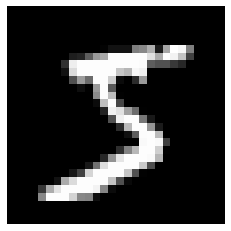

In [13]:
X = train_ds.data[0]

# 繪製點陣圖，cmap='gray':灰階
plt.imshow(X.reshape(28,28), cmap='gray')

# 隱藏刻度
plt.axis('off') 

# 顯示圖形
plt.show() 

In [14]:
transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081))
])

In [15]:
train_ds = MNIST('', train = True, download = True, transform = transforms)

In [16]:
model = torch.nn.Sequential(
torch.nn.Flatten(),
torch.nn.Linear(28 * 28, 256),
nn.Dropout(0.2),
torch.nn.Linear(256, 10)).to(device)

In [17]:
epochs = 5
lr = 0.1
train_loader = DataLoader(train_ds, batch_size = 600)
optimizer = torch.optim.Adadelta(model.parameters(), lr = lr)

In [18]:
criterion = nn.CrossEntropyLoss()
model.train()
loss_list = []
for epoch in range(1, epochs + 1):
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            loss_list.append(loss.item())
            batch = batch_idx * len(data)
            data_count = len(train_loader.dataset)
            percentage = (100. * batch_idx / len(train_loader))
            print(f'Epoch {epoch}: [{batch:5d} / {data_count}] ({percentage:.0f}%)' f' Loss: {loss.item():.6f}')

Epoch 1: [    0 / 60000] (0%) Loss: 2.300007
Epoch 1: [ 6000 / 60000] (10%) Loss: 1.264730
Epoch 1: [12000 / 60000] (20%) Loss: 0.969756
Epoch 1: [18000 / 60000] (30%) Loss: 0.732796
Epoch 1: [24000 / 60000] (40%) Loss: 0.640906
Epoch 1: [30000 / 60000] (50%) Loss: 0.657205
Epoch 1: [36000 / 60000] (60%) Loss: 0.509171
Epoch 1: [42000 / 60000] (70%) Loss: 0.582772
Epoch 1: [48000 / 60000] (80%) Loss: 0.396073
Epoch 1: [54000 / 60000] (90%) Loss: 0.431202
Epoch 2: [    0 / 60000] (0%) Loss: 0.406442
Epoch 2: [ 6000 / 60000] (10%) Loss: 0.318440
Epoch 2: [12000 / 60000] (20%) Loss: 0.432115
Epoch 2: [18000 / 60000] (30%) Loss: 0.337445
Epoch 2: [24000 / 60000] (40%) Loss: 0.374227
Epoch 2: [30000 / 60000] (50%) Loss: 0.401978
Epoch 2: [36000 / 60000] (60%) Loss: 0.353657
Epoch 2: [42000 / 60000] (70%) Loss: 0.463738
Epoch 2: [48000 / 60000] (80%) Loss: 0.297539
Epoch 2: [54000 / 60000] (90%) Loss: 0.349371
Epoch 3: [    0 / 60000] (0%) Loss: 0.313185
Epoch 3: [ 6000 / 60000] (10%) Loss: 

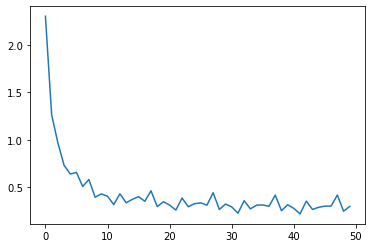

In [19]:
plt.plot(loss_list)

In [20]:
test_loader = DataLoader(test_ds, shuffle = False, batch_size = BATCH_SIZE)
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        test_loss = criterion(output, target).item()
        pred = output.argmax(dim = 1, keepdim = True)
        correct += pred.eq(target.view_as(pred)).sum().item()
test_loss /= len(test_loader.dataset)
batch = batch_idx * len(data)
data_count = len(test_loader.dataset)
percentage = 100. * correct / data_count
print(f'平均損失: {test_loss:.4f}, 準確率: {correct / data_count}' + f' ({percentage:.0f}\n)')

平均損失: 0.0001, 準確率: 0.8466 (85
)
